In [3]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 2.0 MB/s eta 0:00:06
   ---- ----------------------------------- 1.3/11.1 MB 2.5 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.1 MB 2.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.1 MB 3.1 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.1 MB 3.1 MB/s eta 0:00:03
   --------------- ------------------------ 4.2/11.1 MB 3.1 MB/s eta 0:00:03
   ----------------- ---------------------- 4.7/11.1 MB 3.1 MB/s eta 0:00:03
   ------------------- -------------------- 5.5/11.1 MB 3.0 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 3.0 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.1 MB 3.0 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.1 MB 3.0 MB/s eta 0:00:02
   ----------

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# 1) Two circles:

### 1.1) Decision Boundary:

In [5]:
X, y = make_circles(n_samples=500, noise=0.1)
X[y==0, :] *= 1.8

In [6]:
print(X.shape, y.shape)

(500, 2) (500,)


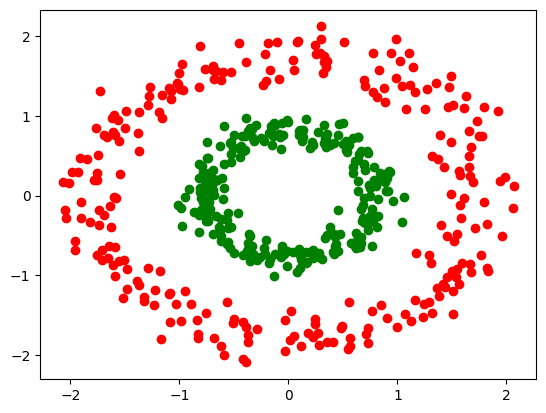

In [7]:
plt.scatter(X[y==1, 0], X[y==1, 1], c='green')
plt.scatter(X[y==0, 0], X[y==0, 1], c='red')

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [9]:
lgr = LogisticRegression()
lgr.fit(X, y)

LogisticRegression()

In [10]:
steps = [('poly_feature', PolynomialFeatures(degree=2)),
         ('lgr', LogisticRegression(fit_intercept=False))]

poly_lgr = Pipeline(steps=steps)

poly_lgr.fit(X, y)

Pipeline(steps=[('poly_feature', PolynomialFeatures()),
                ('lgr', LogisticRegression(fit_intercept=False))])

In [11]:
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

In [12]:
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                     np.linspace(x2_min, x2_max, 500))

X_input = np.c_[xx.reshape(-1), yy.reshape(-1)]

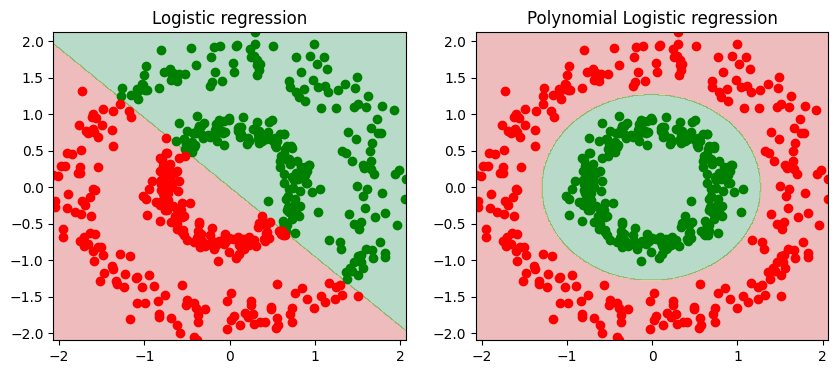

In [13]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Logistic regression')
plt.contourf(xx, yy, lgr.predict(X=X_input).reshape((500, 500)), cmap='RdYlGn', alpha=0.3)
y_pred = lgr.predict(X=X)
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='green')
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='red')

plt.subplot(122)
plt.title('Polynomial Logistic regression')
plt.contourf(xx, yy, poly_lgr.predict(X=X_input).reshape((500, 500)), cmap='RdYlGn', alpha=0.3)
y_pred = poly_lgr.predict(X=X)
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1], c='green')
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1], c='red');

# Try yourself:

Please test different kernel functions for Two-moons data set.

In [14]:
from sklearn.datasets import make_moons

In [15]:
X, y = make_moons(n_samples=500, noise=0.05)

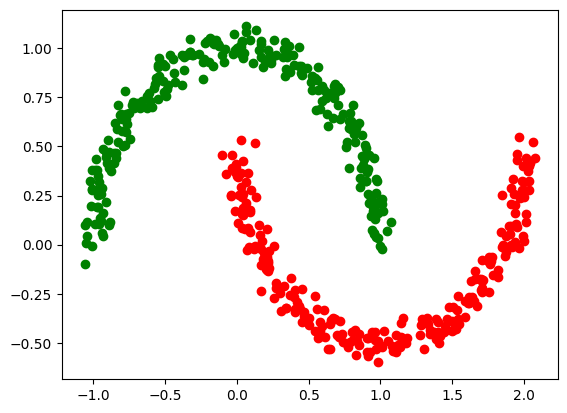

In [16]:
plt.scatter(X[y==0, 0], X[y==0, 1], c='green')
plt.scatter(X[y==1, 0], X[y==1, 1], c='red');

# 2) Spam ditection:

In [19]:
data = pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## 2.1) Feature extraction

<img src="https://miro.medium.com/v2/resize:fit:1400/1*V9ac4hLVyms79jl65Ym_Bw.jpeg">

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
X = TfidfVectorizer().fit_transform(data['Message']).toarray()

In [23]:
y = data['Category'].map({'spam': 1, 'ham': 0})

In [24]:
X.shape, y.shape

((5572, 8709), (5572,))

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = lgr.predict(X_test)

# 3) Model evaluation

In [30]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [31]:
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(recall_score(y_true=y_test, y_pred=y_pred))
print(precision_score(y_true=y_test, y_pred=y_pred))
print(f1_score(y_true=y_test, y_pred=y_pred))

0.9569451563300871
0.6612244897959184
0.9938650306748467
0.7941176470588235


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

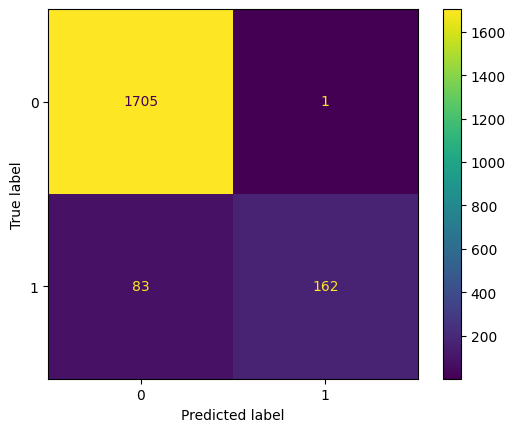

In [33]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
disp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, 
                                               y_pred=y_pred))

disp.plot();